In [206]:
# Importa las bibliotecas necesarias
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.signal as signal
import cftime
import netCDF4 as nc
import pandas as pd
import datetime as dt
import scipy
from scipy.stats import linregress
import matplotlib.dates as mdates



In [207]:
import seaborn as sns
from scipy.stats import norm


In [208]:
# Abrir el archivo NetCDF
temp=nc.Dataset('C:\\Users\\Janus\\Downloads\\r.nc','r')
temp2=nc.Dataset('C:\\Users\\Janus\\Downloads\\rr.nc','r')
temperatura = temp.variables['sst'][:]
temperatura2 = temp2.variables['sst'][:]
temx=xr.open_dataset('C:\\Users\\Janus\\Downloads\\r.nc',engine='scipy')
temx2=xr.open_dataset('C:\\Users\\Janus\\Downloads\\rr.nc',engine='scipy')

In [209]:
fechasi = temx['time']
fechasi2 = temx2['time']
fechas = pd.DataFrame(fechasi.values, columns=['fecha'])
fechas2 = pd.DataFrame(fechasi2.values, columns=['fecha'])
ssti = temperatura[:, 0, 0,]
ssat = pd.DataFrame(temperatura[:, 0, 0,], columns=['sst'])
ssat2 = pd.DataFrame(temperatura2[:, 0, 0,], columns=['sst'])

serie = pd.concat([ssat, fechas], axis=1)
serie2 = pd.concat([ssat2, fechas2], axis=1)
seriec = pd.concat([serie, serie2], axis=0, ignore_index=True)

print(seriec)


               sst               fecha
0       300.066662 1992-01-01 00:00:00
1       300.066662 1992-01-01 01:00:00
2       300.066662 1992-01-01 02:00:00
3       300.066662 1992-01-01 03:00:00
4       300.066662 1992-01-01 04:00:00
...            ...                 ...
175315  300.390345 2011-12-31 19:00:00
175316  300.390345 2011-12-31 20:00:00
175317  300.390345 2011-12-31 21:00:00
175318  300.393314 2011-12-31 22:00:00
175319  300.393314 2011-12-31 23:00:00

[175320 rows x 2 columns]


In [210]:
seriec['tiempo'] = (seriec['fecha'] - seriec['fecha'].min()).dt.total_seconds()
print(seriec)

               sst               fecha       tiempo
0       300.066662 1992-01-01 00:00:00          0.0
1       300.066662 1992-01-01 01:00:00       3600.0
2       300.066662 1992-01-01 02:00:00       7200.0
3       300.066662 1992-01-01 03:00:00      10800.0
4       300.066662 1992-01-01 04:00:00      14400.0
...            ...                 ...          ...
175315  300.390345 2011-12-31 19:00:00  631134000.0
175316  300.390345 2011-12-31 20:00:00  631137600.0
175317  300.390345 2011-12-31 21:00:00  631141200.0
175318  300.393314 2011-12-31 22:00:00  631144800.0
175319  300.393314 2011-12-31 23:00:00  631148400.0

[175320 rows x 3 columns]


In [211]:
slope, intercept, _, _, _ = linregress(seriec['tiempo'], seriec['sst'])

tendencia = intercept + slope * seriec['tiempo']

In [212]:
YO = seriec['sst'].values

YOm = np.mean(YO) 
YOm = YOm - np.mean(YOm)
Yclimatologico = YOm
YOM = np.tile(YOm, len(YO))
Y = YO
yf = Y - np.mean(Y)
X = np.arange(len(Y))
seriec['mes'] = seriec['fecha'].dt.month
promedio_climatologico = seriec.groupby('mes')['sst'].transform('mean')

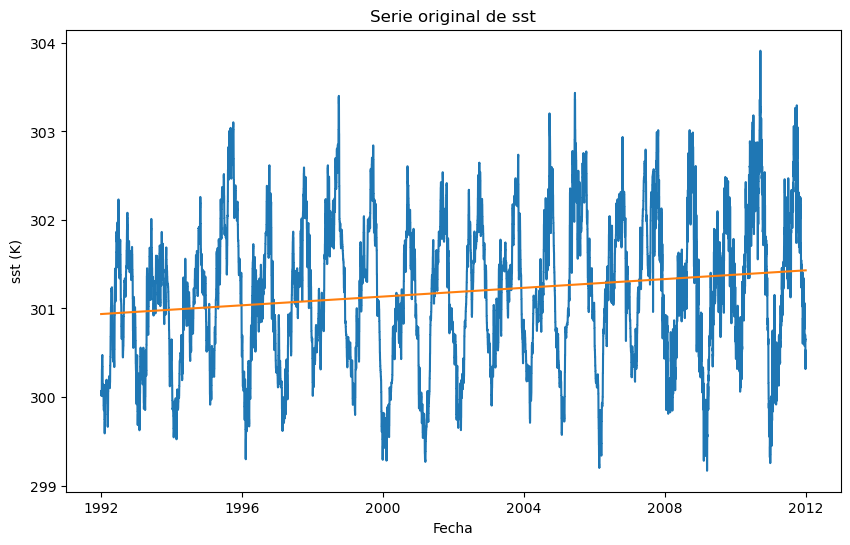

In [215]:
# Graficar la serie original
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], Y)
plt.plot(seriec['fecha'], tendencia)
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Serie original de sst')
plt.show()


Text(0.5, 1.0, 'Ciclo estacional de sst sin tendencia y sin media')

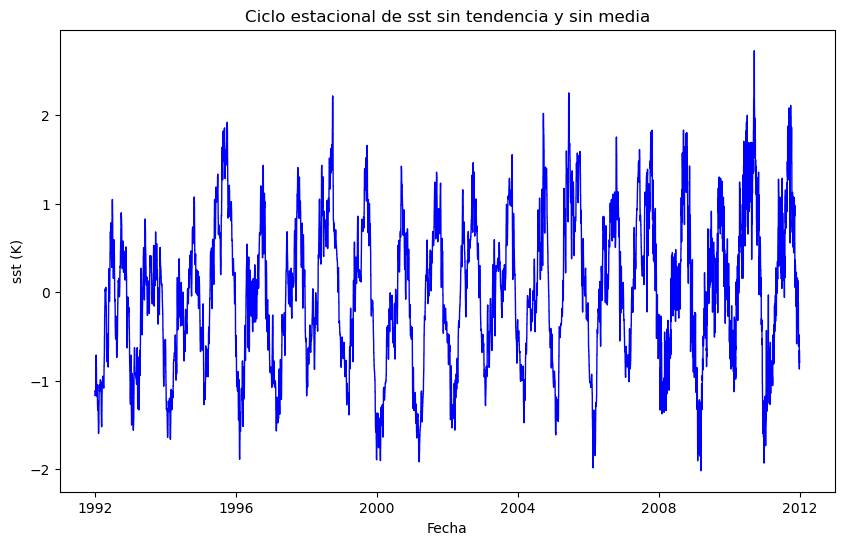

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], yf, color='b', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Ciclo estacional de sst sin tendencia y sin media')

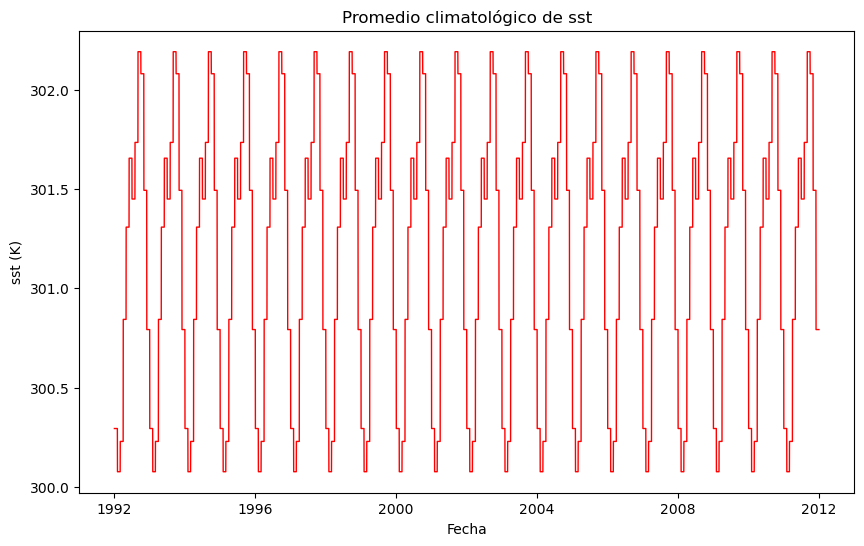

In [217]:
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], promedio_climatologico, color='r', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Promedio climatológico de sst')
plt.show()

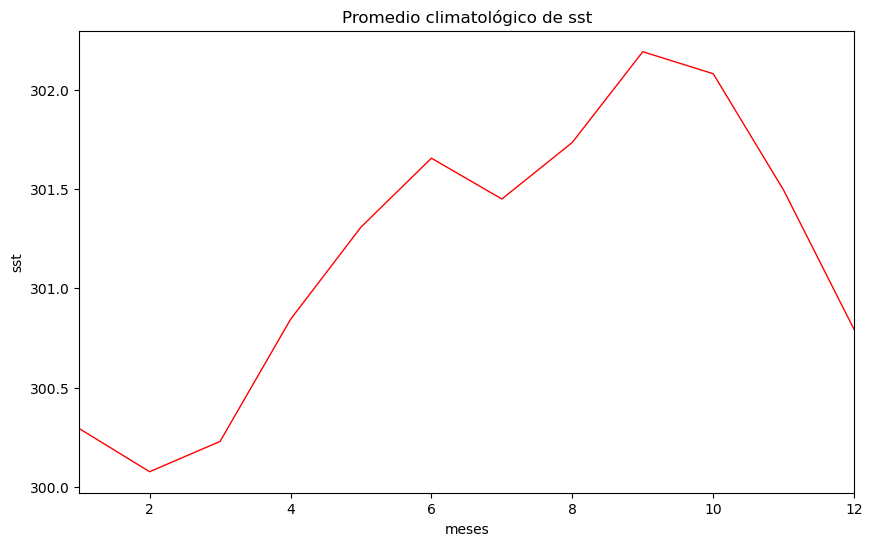

In [171]:
seriec['promedio_climatologico']=promedio_climatologico
seriec['mes'] = seriec['fecha'].dt.month
datos_por_mes = seriec.groupby('mes')['promedio_climatologico'].first()
plt.figure(figsize=(10, 6))
plt.plot(datos_por_mes.index, datos_por_mes.values, color='r', linewidth=1)
plt.xlabel('meses')
plt.ylabel('sst')
plt.title('Promedio climatológico de sst')
plt.xlim(1,12)
plt.show()

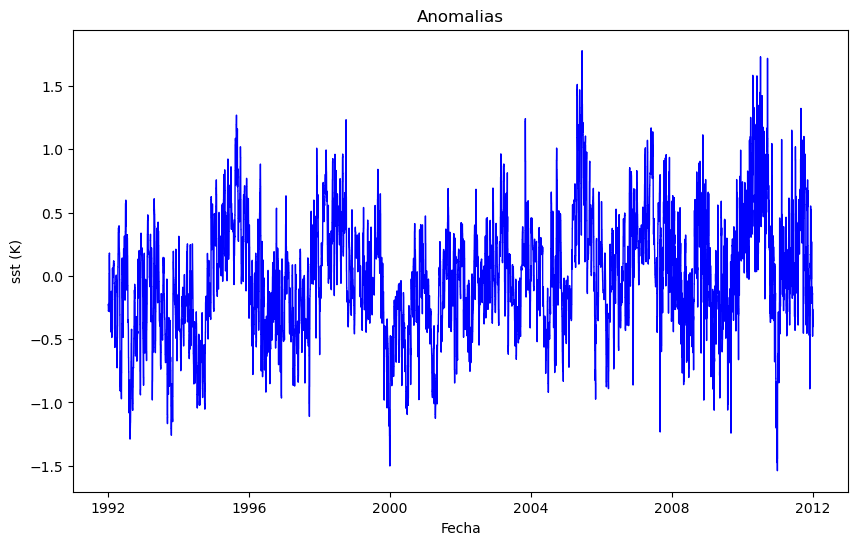

In [218]:
anomalia=seriec['sst']-promedio_climatologico
plt.figure(figsize=(10, 6))
plt.plot(seriec['fecha'], anomalia, color='b', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Anomalias')
plt.show()

In [173]:
seriee=seriec
seriee['fecha'] = pd.to_datetime(seriec['fecha'])
seriee.set_index('fecha', inplace=True)
promedio_diario = seriee['sst'].resample('1D').mean()
promedio_mensual = seriee['sst'].resample('1M').mean()
promedio_anual = seriee['sst'].resample('1Y').mean()

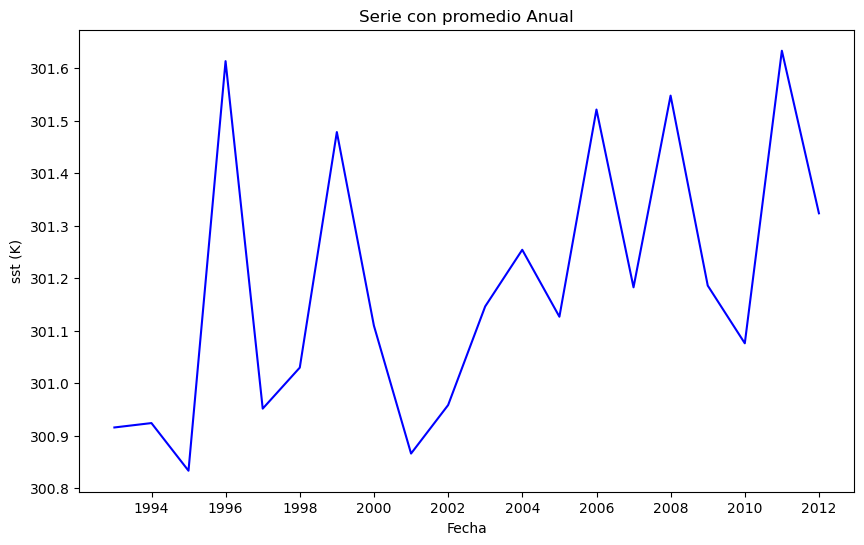

In [219]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_anual.index, promedio_anual.values, label='Promedio Anual', color='blue')
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Serie con promedio Anual')
plt.show()


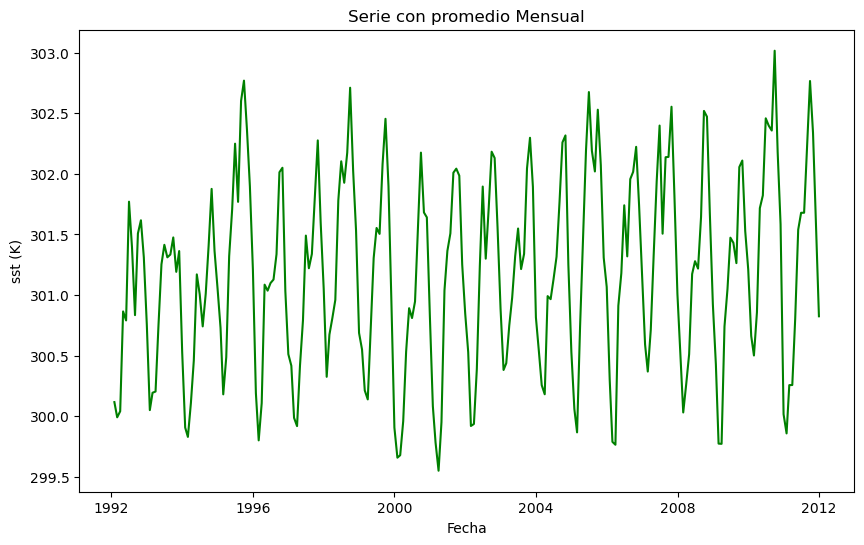

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_mensual.index, promedio_mensual.values, label='Promedio Mensual', color='green')
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Serie con promedio Mensual')
plt.show()

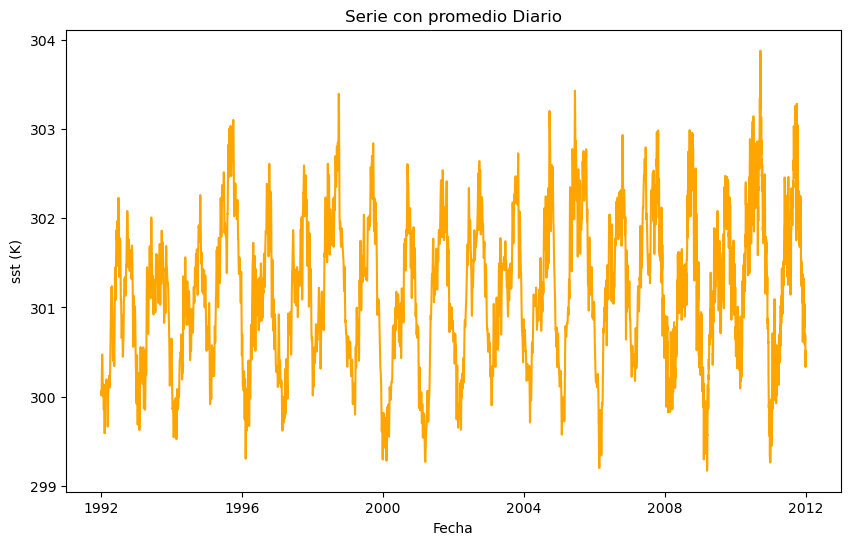

In [221]:
plt.figure(figsize=(10, 6))
plt.plot(promedio_diario.index, promedio_diario.values, label='Promedio Diario', color='orange')
plt.xlabel('Fecha')
plt.ylabel('sst (K)')
plt.title('Serie con promedio Diario')
plt.show()

In [177]:
prob_acumulada = (seriee['sst'] - seriee['sst'].min()) / (seriee['sst'].max() - seriee['sst'].min())

In [178]:
print(prob_acumulada)

fecha
1992-01-01 00:00:00    0.189618
1992-01-01 01:00:00    0.189618
1992-01-01 02:00:00    0.189618
1992-01-01 03:00:00    0.189618
1992-01-01 04:00:00    0.189618
                         ...   
2011-12-31 19:00:00    0.257840
2011-12-31 20:00:00    0.257840
2011-12-31 21:00:00    0.257840
2011-12-31 22:00:00    0.258465
2011-12-31 23:00:00    0.258465
Name: sst, Length: 175320, dtype: float64


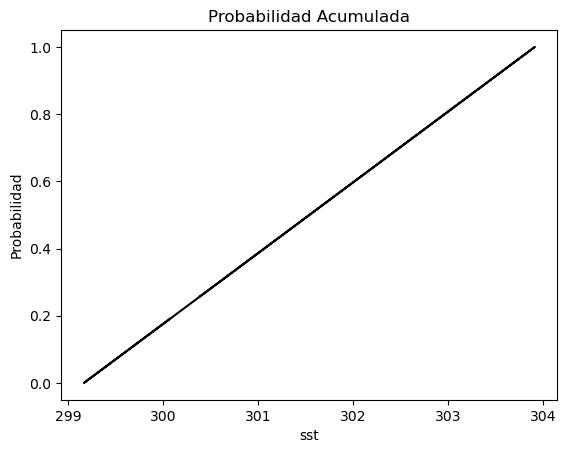

In [179]:
plt.plot(seriee['sst'], prob_acumulada.values, label='Promedio Diario', color='black')
plt.xlabel('sst')
plt.ylabel('Probabilidad')
plt.title('Probabilidad Acumulada')
plt.show()

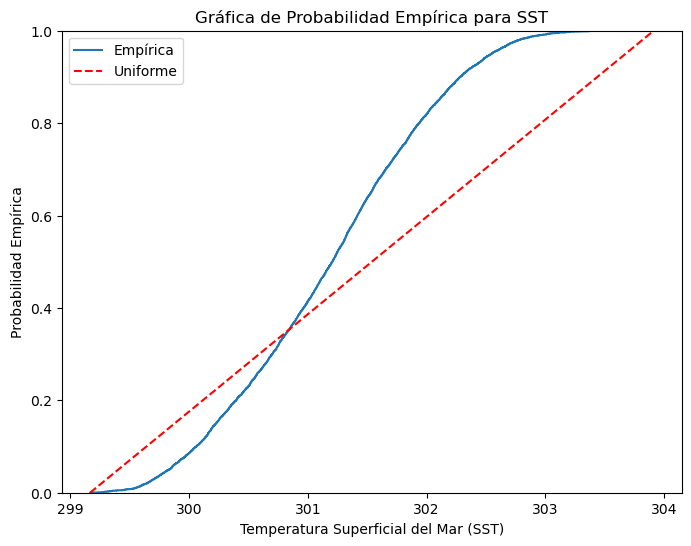

In [180]:

plt.figure(figsize=(8, 6))
sns.ecdfplot(seriee['sst'], label='Empírica')
plt.plot([min(seriee['sst']), max(seriee['sst'])], [0, 1], linestyle='--', color='red', label='Uniforme')
plt.title('Gráfica de Probabilidad Empírica para SST')
plt.xlabel('Temperatura Superficial del Mar (SST)')
plt.ylabel('Probabilidad Empírica')
plt.legend()
plt.show()

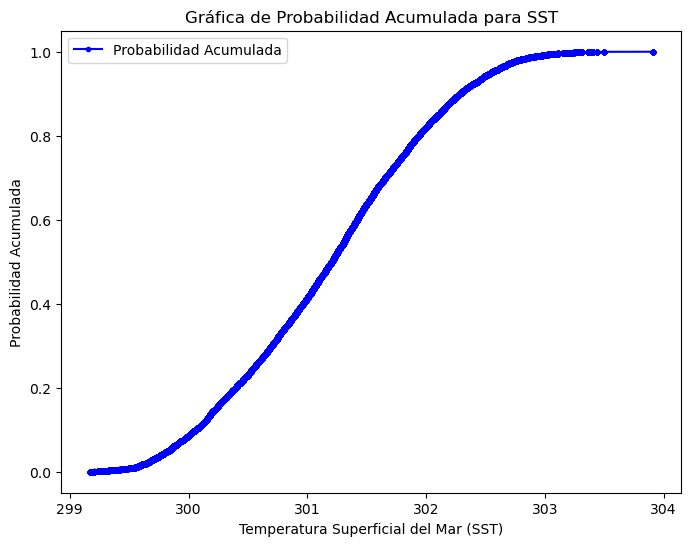

In [181]:
x = np.sort(seriee['sst'])
y = np.arange(1, len(x) + 1) / len(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='.', linestyle='-', color='blue', label='Probabilidad Acumulada')
plt.title('Gráfica de Probabilidad Acumulada para SST')
plt.xlabel('Temperatura Superficial del Mar (SST)')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

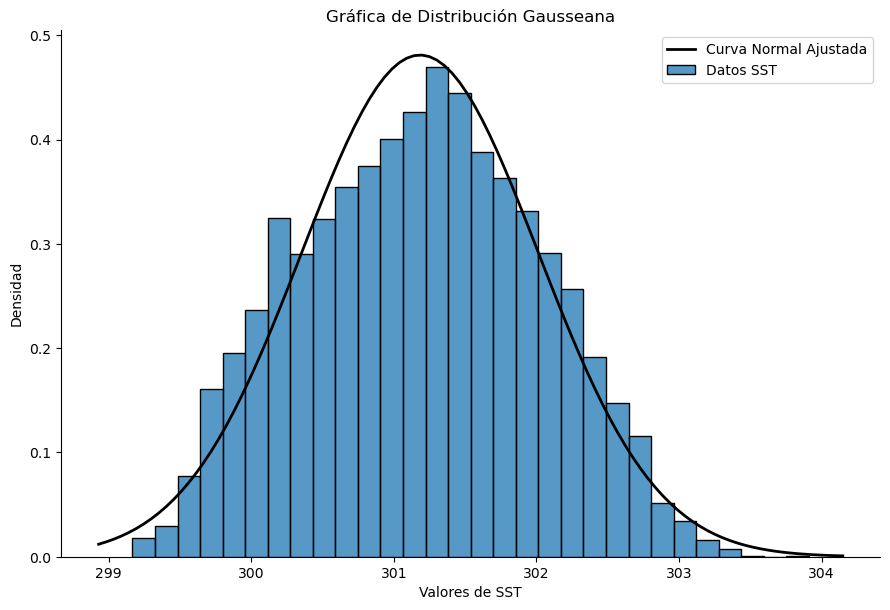

In [224]:
plt.figure(figsize=(8, 6))
sns.displot(seriee['sst'], bins=30, kde_kws={"bw_adjust": 1.5}, stat="density", label='Datos SST', height=6, aspect=1.5)
mu, std = seriee['sst'].mean(), seriee['sst'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ajustada')
plt.title('Gráfica de Distribución Gausseana')
plt.xlabel('Valores de SST')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [183]:
umbral = 303
seriee['DHW'] = np.maximum(seriee['sst'] - umbral, 0)
cambio_signo = np.sign(seriee['sst'].diff()) != np.sign(seriee['sst'])
seriee['DHW'] = np.where(np.logical_or(cambio_signo, seriee['sst'] <= umbral), 0, seriee['DHW'])
seriee['DHW_acumulado'] = seriee['DHW'].cumsum()
print(seriee[['sst', 'DHW', 'DHW_acumulado']])

                            sst  DHW  DHW_acumulado
fecha                                              
1992-01-01 00:00:00  300.066662  0.0       0.000000
1992-01-01 01:00:00  300.066662  0.0       0.000000
1992-01-01 02:00:00  300.066662  0.0       0.000000
1992-01-01 03:00:00  300.066662  0.0       0.000000
1992-01-01 04:00:00  300.066662  0.0       0.000000
...                         ...  ...            ...
2011-12-31 19:00:00  300.390345  0.0       6.218947
2011-12-31 20:00:00  300.390345  0.0       6.218947
2011-12-31 21:00:00  300.390345  0.0       6.218947
2011-12-31 22:00:00  300.393314  0.0       6.218947
2011-12-31 23:00:00  300.393314  0.0       6.218947

[175320 rows x 3 columns]


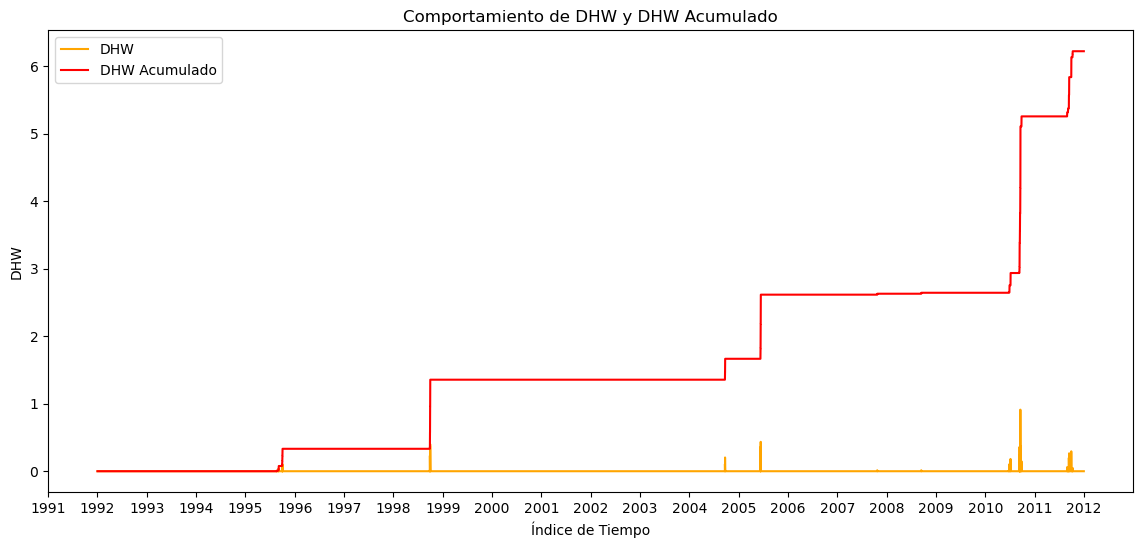

In [200]:
plt.figure(figsize=(14, 6))
plt.plot(seriee['DHW'], label='DHW', color='orange')
plt.plot(seriee['DHW_acumulado'], label='DHW Acumulado', color='red')
plt.xlabel('Índice de Tiempo')
plt.ylabel('DHW')
plt.title('Comportamiento de DHW y DHW Acumulado')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [185]:
seriec.to_csv('sst_base222.csv',index=False,sep=',')

In [186]:
seriec.head(33893)

,sst,tiempo,mes,promedio_climatologico,DHW,DHW_acumulado
fecha,,,,,,
1992-01-01 00:00:00,300.066662,0.0,1,300.293208,0.0,0.000000
1992-01-01 01:00:00,300.066662,3600.0,1,300.293208,0.0,0.000000
1992-01-01 02:00:00,300.066662,7200.0,1,300.293208,0.0,0.000000
1992-01-01 03:00:00,300.066662,10800.0,1,300.293208,0.0,0.000000
1992-01-01 04:00:00,300.066662,14400.0,1,300.293208,0.0,0.000000
...,...,...,...,...,...,...
1995-11-13 00:00:00,302.199695,121996800.0,11,301.494515,0.0,0.332071
1995-11-13 01:00:00,302.199695,122000400.0,11,301.494515,0.0,0.332071
1995-11-13 02:00:00,302.199695,122004000.0,11,301.494515,0.0,0.332071


In [187]:
print(seriec)

                            sst       tiempo  mes  promedio_climatologico  \
fecha                                                                       
1992-01-01 00:00:00  300.066662          0.0    1              300.293208   
1992-01-01 01:00:00  300.066662       3600.0    1              300.293208   
1992-01-01 02:00:00  300.066662       7200.0    1              300.293208   
1992-01-01 03:00:00  300.066662      10800.0    1              300.293208   
1992-01-01 04:00:00  300.066662      14400.0    1              300.293208   
...                         ...          ...  ...                     ...   
2011-12-31 19:00:00  300.390345  631134000.0   12              300.792197   
2011-12-31 20:00:00  300.390345  631137600.0   12              300.792197   
2011-12-31 21:00:00  300.390345  631141200.0   12              300.792197   
2011-12-31 22:00:00  300.393314  631144800.0   12              300.792197   
2011-12-31 23:00:00  300.393314  631148400.0   12              300.792197   

In [188]:
from scipy.fft import fft
from scipy.fft import fftfreq


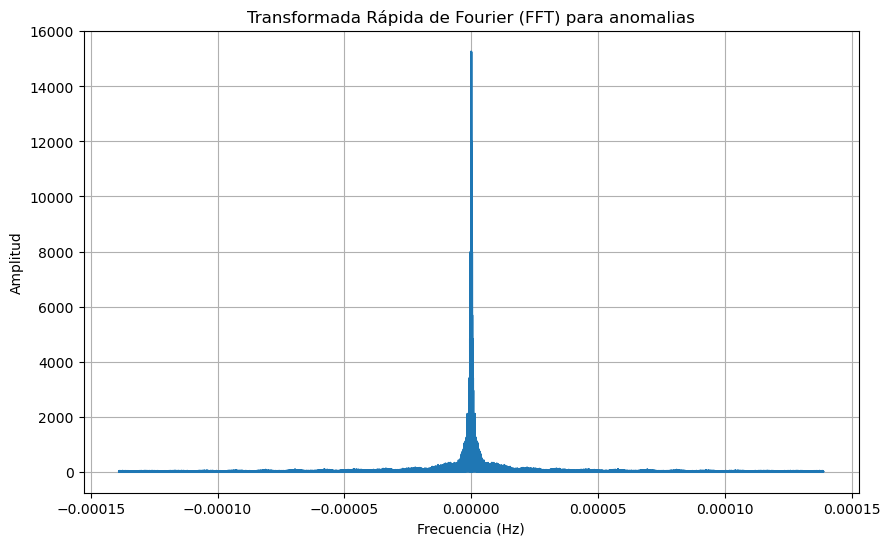

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies2, np.abs(fft_resulta))
plt.title('Transformada Rápida de Fourier (FFT) para anomalias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [201]:
fft1 = np.fft.fft(seriec['sst'].values.copy())

In [202]:
fsst = seriec['sst']- signal.savgol_filter(seriec['sst'], window_length=15, polyorder=2)

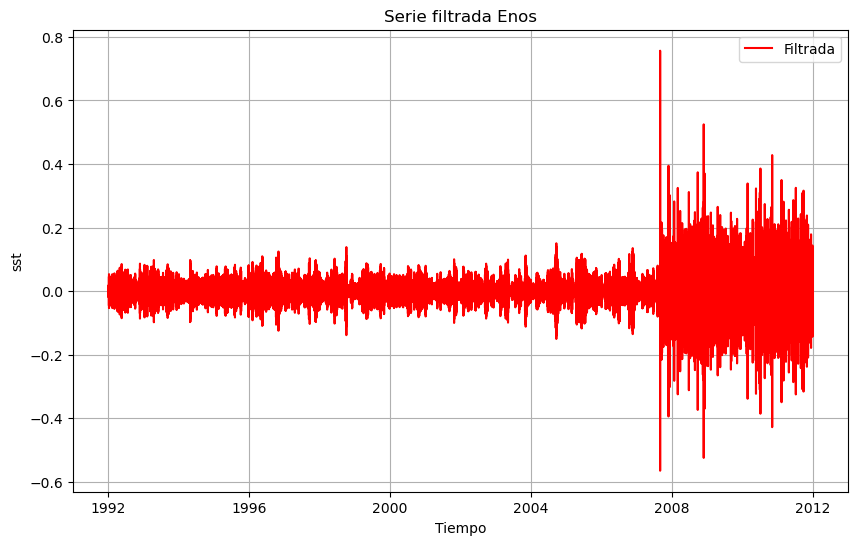

In [203]:
plt.figure(figsize=(10, 6))

plt.plot(seriec['sst'].index, fsst, label='Filtrada', color='red')
plt.title('Serie filtrada Enos')
plt.xlabel('Tiempo')
plt.ylabel('sst')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
fssta = anomalia- signal.savgol_filter(anomalia, window_length=11, polyorder=3)

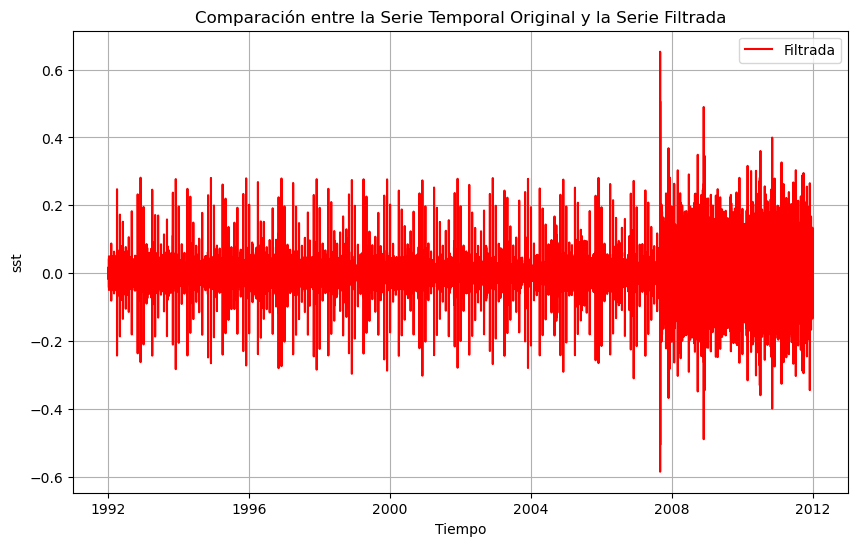

In [198]:
plt.figure(figsize=(10, 6))

plt.plot(seriec['sst'].index, fssta, label='Filtrada', color='red')
plt.title('Comparación entre la Serie Temporal Original y la Serie Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('sst')
plt.legend()
plt.grid(True)
plt.show()